In [1]:
import numpy as np
from retro_likelihood import retroLLH
import pickle
import dragoman as dm

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [3]:
retro_llh = retroLLH()

Instantiating and loading DOM tables
These DOMs will be disabled and return 0's for expected photon computations. 5072 DOMs remain.
failed to find "/home/iwsatlas1/peller/work/retro_tables/SpiceLea/tilt_on_anisotropy_on_noazimuth_ic80_dc60_histats/cl140" (this may inidicate that all existing tables are loaded)

  -> 3.575 s

dom_tables.shape: (140, 80, 40, 100)
dom_table_norms.shape: (140, 80, 100)
t_indep_dom_tables.shape: (140, 80, 40, 40, 40)
t_indep_dom_table_norms.shape: (140, 80)
track_kernel: table_energy_loss


In [4]:
with open('test_data/test_event.pkl', 'rb') as f:
    event = pickle.load(f)

In [5]:
N = 10
p = dm.GridData(x = np.linspace(event['params'][0] - 50, event['params'][0] + 50, N),
                y = np.linspace(event['params'][1] - 50, event['params'][1] + 50, N)
               )

In [7]:
params = np.repeat(event['params'][np.newaxis, :], N**2, axis=0)

params[:, 0] = p.get_array('x', flat=True)
params[:, 1] = p.get_array('y', flat=True)

llh = retro_llh(event, params)

p['llh'] = llh.reshape(p.shape) - np.min(llh)

/home/iwsatlas1/peller/retro/retro/tables/pexp_5d.py:1349: NumbaWarning: Cannot cache compiled function "table_lookup" as it uses outer variables in a closure
  tdi_tables=tdi_tables,
/home/iwsatlas1/peller/retro/retro/tables/pexp_5d.py:1349: NumbaWarning: Cannot cache compiled function "table_lookup_mean" as it uses outer variables in a closure
  tdi_tables=tdi_tables,
/home/iwsatlas1/peller/retro/retro/tables/pexp_5d.py:1349: NumbaWarning: Cannot cache compiled function "pexp_" as it uses outer variables in a closure
  tdi_tables=tdi_tables,
/home/iwsatlas1/peller/retro/retro/tables/pexp_5d.py:1450: NumbaWarning: Cannot cache compiled function "pexp_" as it uses outer variables in a closure
  tdi_tables=tdi_tables,
/home/iwsatlas1/peller/retro/retro/tables/pexp_5d.py:1548: NumbaWarning: Cannot cache compiled function "get_optimal_scalefactors" as it uses outer variables in a closure
  idx=n+1,
/home/iwsatlas1/peller/retro/retro/tables/pexp_5d.py:1265: NumbaWarning: Cannot cache compi

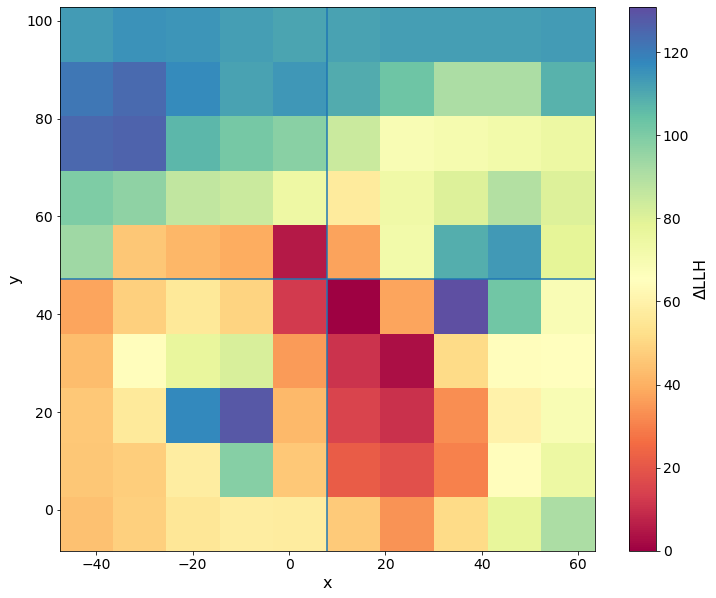

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (12,10))

np.clip(p['llh'], 0, 150).plot(cmap='Spectral', cbar=True, ax=ax, label=r'$\Delta$LLH')

ax.axvline(event['params'][0])
ax.axhline(event['params'][1])

plt.savefig('retro_test.png')

In [13]:
p.grid.axes[0].var

'x'